In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/A4_P1_7c6961dc-3028-4a96-bfd9-7fd871dc7520.csv')  # Replace with your file path if needed




In [21]:
X = df[['X1', 'X2']].values
y = df['y'].values


X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

def step(x):
    return np.where(x >= 0, 1, 0)

def train_perceptron(X, y, lr=0.01, epochs=20):
    weights = np.random.randn(X.shape[1])
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            z = np.dot(X[i], weights)
            y_pred = step(z)
            error = y[i] - y_pred
            weights += lr * error * X[i]
    return weights



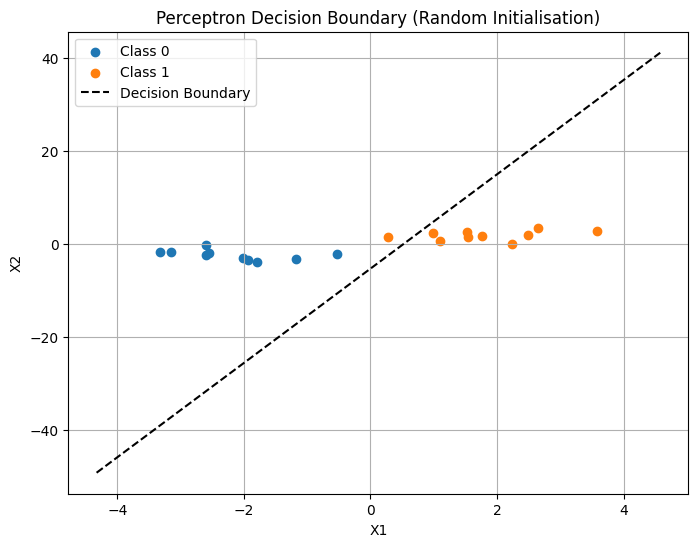

In [22]:

def plot_decision_boundary(X, y, weights, title):
    plt.figure(figsize=(8, 6))


    for label in np.unique(y):
        plt.scatter(X[y==label, 1], X[y==label, 2], label=f"Class {int(label)}")

    x_vals = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    y_vals = -(weights[0] + weights[1]*x_vals) / weights[2]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()


weights = train_perceptron(X_bias, y, lr=0.01, epochs=20)
plot_decision_boundary(X_bias, y, weights, title="Perceptron Decision Boundary (Random Initialisation)")

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

np.random.seed(42)

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)













In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


input_size = X_train.shape[1]       # 4 features
hidden_size = 5                     # as specified
output_size = y_encoded.shape[1]    # 3 classes
learning_rate = 0.01
epochs = 1000


In [25]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def softmax(x):
    exp = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return (y_pred - y_true)

In [26]:

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    # FORWARD pass
    z1 = X_train @ W1 + b1
    a1 = tanh(z1)
    z2 = a1 @ W2 + b2
    y_pred = softmax(z2)

    # Loss
    loss = mse_loss(y_train, y_pred)
    train_losses.append(loss)

    # Accuracy
    train_accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_train, axis=1))
    train_accuracies.append(train_accuracy)

    # BACKWARD pass
    dL_dz2 = mse_derivative(y_train, y_pred)  # (N, C)
    dL_dW2 = a1.T @ dL_dz2                    # (H, C)
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    dL_da1 = dL_dz2 @ W2.T
    dL_dz1 = dL_da1 * tanh_derivative(z1)
    dL_dW1 = X_train.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # Weight update
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1


    z1_test = X_test @ W1 + b1
    a1_test = tanh(z1_test)
    z2_test = a1_test @ W2 + b2
    y_pred_test = softmax(z2_test)

    test_loss = mse_loss(y_test, y_pred_test)
    test_accuracy = np.mean(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1))

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

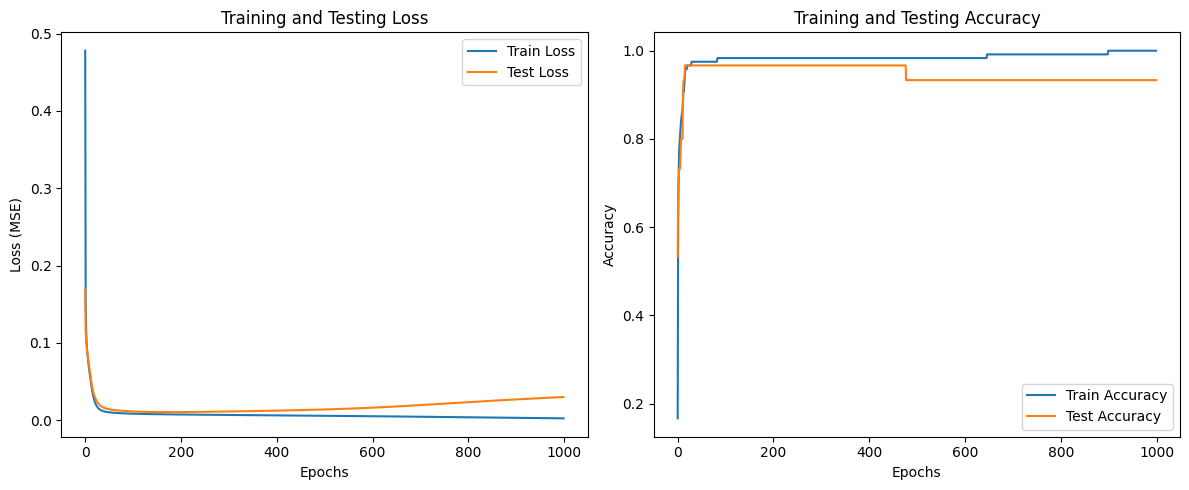

In [27]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Testing Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy")
plt.legend()

plt.tight_layout()
plt.show()